In [ ]:
# 데이터를 잘 들여다 보기 위해 install해야 하는 라이브러리
!pip install pandas-profiling==3.1.0
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
data = pd.read_csv("/content/drive/MyDrive/covtype.csv")
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
print(data.shape)
print(data.info())
data.describe(include="all").T

(581012, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [ ]:
# 중복되는 값이 있는 확인합니다.
data.duplicated().sum()

# 결측치를 확인합니다.
data.isna().sum()[data.isna().sum() !=0]/len(data)

Series([], dtype: float64)

In [ ]:
data.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, minimal=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data = data.copy()

# # 원핫인코더 전으로 변경하기(Wilderness_Area )
data['Wilderness_Area1'] = data['Wilderness_Area1'].replace({1:'Rawah', 0:''})
data['Wilderness_Area2'] = data['Wilderness_Area2'].replace({1:'Neota', 0:''})
data['Wilderness_Area3'] = data['Wilderness_Area3'].replace({1:'Comanche Peak', 0:''})
data['Wilderness_Area4'] = data['Wilderness_Area4'].replace({1:'Cache la Poudre', 0:''})

cols1 = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
data['Area'] =data[cols1].apply(lambda row:''.join(row.values.astype(str)), axis=1)

# # 원핫인코더 전으로 변경하기(Soil_Type)
data['Soil_Type1'] = data['Soil_Type1'].replace({1:'Soil_Type 1', 0:''})
data['Soil_Type2'] = data['Soil_Type2'].replace({1:'Soil_Type 2', 0:''})
data['Soil_Type3'] = data['Soil_Type3'].replace({1:'Soil_Type 3', 0:''})
data['Soil_Type4'] = data['Soil_Type4'].replace({1:'Soil_Type 4', 0:''})
data['Soil_Type5'] = data['Soil_Type5'].replace({1:'Soil_Type 5', 0:''})

data['Soil_Type6'] = data['Soil_Type6'].replace({1:'Soil_Type 6', 0:''})
data['Soil_Type7'] = data['Soil_Type7'].replace({1:'Soil_Type 7', 0:''})
data['Soil_Type8'] = data['Soil_Type8'].replace({1:'Soil_Type 8', 0:''})
data['Soil_Type9'] = data['Soil_Type9'].replace({1:'Soil_Type 9', 0:''})
data['Soil_Type10'] = data['Soil_Type10'].replace({1:'Soil_Type10', 0:''})

data['Soil_Type11'] = data['Soil_Type11'].replace({1:'Soil_Type11', 0:''})
data['Soil_Type12'] = data['Soil_Type12'].replace({1:'Soil_Type12', 0:''})
data['Soil_Type13'] = data['Soil_Type13'].replace({1:'Soil_Type13', 0:''})
data['Soil_Type14'] = data['Soil_Type14'].replace({1:'Soil_Type14', 0:''})
data['Soil_Type15'] = data['Soil_Type15'].replace({1:'Soil_Type15', 0:''})

data['Soil_Type16'] = data['Soil_Type16'].replace({1:'Soil_Type16', 0:''})
data['Soil_Type17'] = data['Soil_Type17'].replace({1:'Soil_Type17', 0:''})
data['Soil_Type18'] = data['Soil_Type18'].replace({1:'Soil_Type18', 0:''})
data['Soil_Type19'] = data['Soil_Type19'].replace({1:'Soil_Type19', 0:''})
data['Soil_Type20'] = data['Soil_Type20'].replace({1:'Soil_Type20', 0:''})

data['Soil_Type21'] = data['Soil_Type21'].replace({1:'Soil_Type21', 0:''})
data['Soil_Type22'] = data['Soil_Type22'].replace({1:'Soil_Type22', 0:''})
data['Soil_Type23'] = data['Soil_Type23'].replace({1:'Soil_Type23', 0:''})
data['Soil_Type24'] = data['Soil_Type24'].replace({1:'Soil_Type24', 0:''})
data['Soil_Type25'] = data['Soil_Type25'].replace({1:'Soil_Type25', 0:''})

data['Soil_Type26'] = data['Soil_Type26'].replace({1:'Soil_Type26', 0:''})
data['Soil_Type27'] = data['Soil_Type27'].replace({1:'Soil_Type27', 0:''})
data['Soil_Type28'] = data['Soil_Type28'].replace({1:'Soil_Type28', 0:''})
data['Soil_Type29'] = data['Soil_Type29'].replace({1:'Soil_Type29', 0:''})
data['Soil_Type30'] = data['Soil_Type30'].replace({1:'Soil_Type30', 0:''})

data['Soil_Type31'] = data['Soil_Type31'].replace({1:'Soil_Type31', 0:''})
data['Soil_Type32'] = data['Soil_Type32'].replace({1:'Soil_Type32', 0:''})
data['Soil_Type33'] = data['Soil_Type33'].replace({1:'Soil_Type33', 0:''})
data['Soil_Type34'] = data['Soil_Type34'].replace({1:'Soil_Type34', 0:''})
data['Soil_Type35'] = data['Soil_Type35'].replace({1:'Soil_Type35', 0:''})

data['Soil_Type36'] = data['Soil_Type36'].replace({1:'Soil_Type36', 0:''})
data['Soil_Type37'] = data['Soil_Type37'].replace({1:'Soil_Type37', 0:''})
data['Soil_Type38'] = data['Soil_Type38'].replace({1:'Soil_Type38', 0:''})
data['Soil_Type39'] = data['Soil_Type39'].replace({1:'Soil_Type39', 0:''})
data['Soil_Type40'] = data['Soil_Type40'].replace({1:'Soil_Type40', 0:''})

cols2 = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']
data['Soil_Type'] =data[cols2].apply(lambda row:''.join(row.values.astype(str)), axis=1)

# 원핫인코더 되어 있던 Area, Soil관련 raw자료 삭제
data = data.drop(columns = cols1, axis=1)
data = data.drop(columns = cols2, axis=1)


In [ ]:
# 'Cover_Type':수치형 자료를 나무이름이 있는 데이터로 변경시킴.(추가 분석대비, 그래프의 범례나 이름을 표시하기 위해)
data['Cover_Type_Tree'] = data['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine',3:'Ponderosa Pine', 4:'Cottonwood/Willow',
                                                      5:'Aspen',6:'Douglas-fir',7:'Krummholz',})

# (3번 폰테로사 소나무를 심어도 될까? 3번=yes, 3번 외=no)
data['PonderosaPine'] = data['Cover_Type_Tree'].replace({'Spruce/Fir':'No', 'Lodgepole Pine':'No', 'Ponderosa Pine':'Yes', 'Cottonwood/Willow':'No',
                                                      'Aspen':'No','Douglas-fir':'No','Krummholz':'No',})



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 15 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           581012 non-null  int64 
 1   Aspect                              581012 non-null  int64 
 2   Slope                               581012 non-null  int64 
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64 
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64 
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64 
 6   Hillshade_9am                       581012 non-null  int64 
 7   Hillshade_Noon                      581012 non-null  int64 
 8   Hillshade_3pm                       581012 non-null  int64 
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64 
 10  Cover_Type                          581012 non-null  int64 
 11  Area                                581

타겟데이터의 비율
 No     0.938463
Yes    0.061537
Name: PonderosaPine, dtype: float64


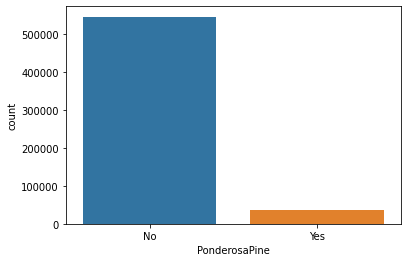

Baseline Accuracy: 0.48759922342395684


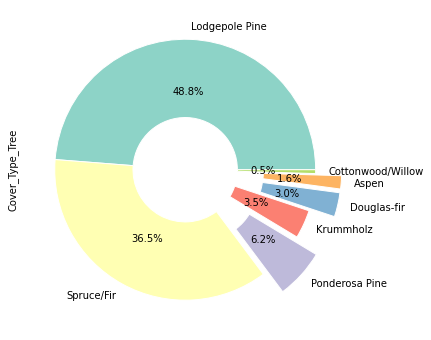

In [ ]:
# 타겟 데이터 범주의 비율을 확인합니다.
y =  data['PonderosaPine']
print("타겟데이터의 비율\n",y.value_counts(normalize=True))
%matplotlib inline
sns.countplot(x=y);
plt.show()

# 원그래프

target = 'Cover_Type_Tree'
colors = sns.color_palette('Set3')
explode = [0, 0, 0.2, 0, 0.2, 0.2, 0]
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 1}
data[target].value_counts(normalize=True).plot.pie(autopct="%.1f%%", figsize = (6,6), startangle=0, colors=colors, explode=explode, wedgeprops=wedgeprops)

print("Baseline Accuracy:", data[target].value_counts(normalize=True).max())

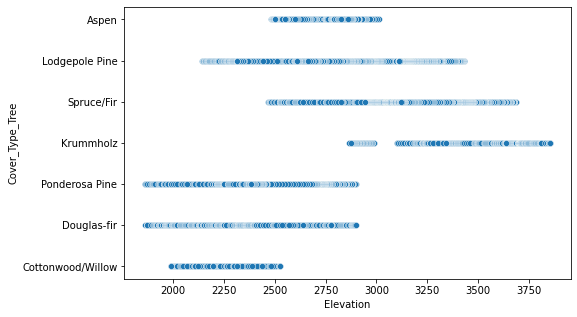

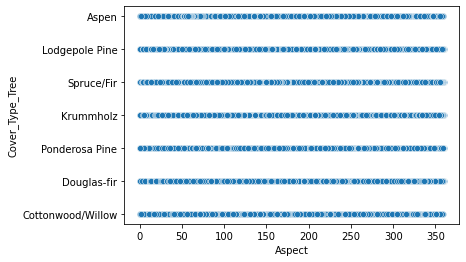

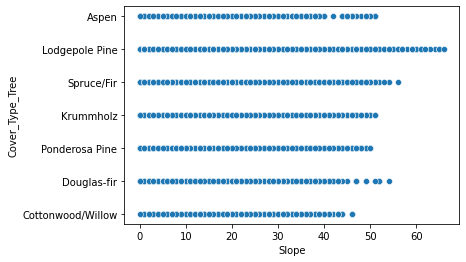

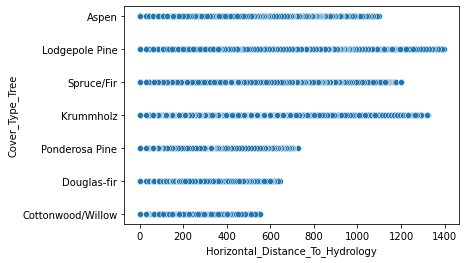

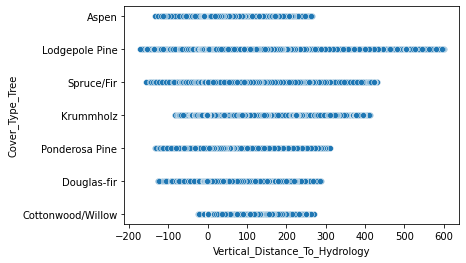

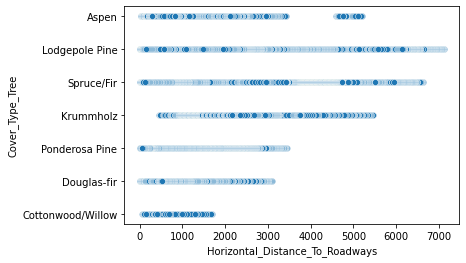

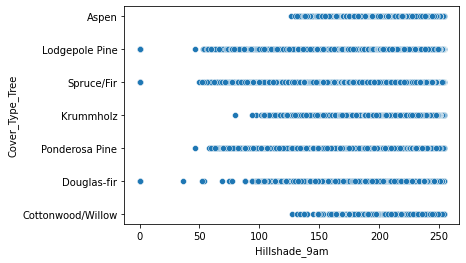

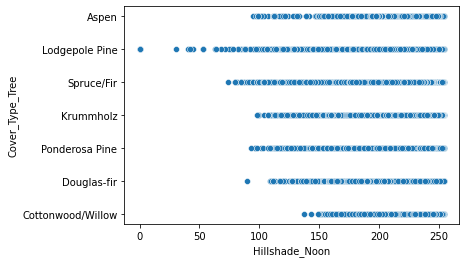

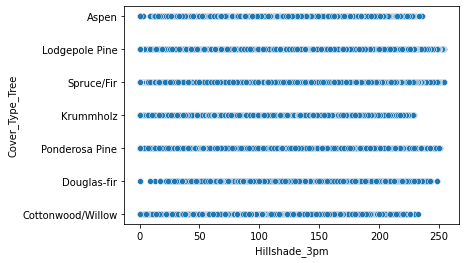

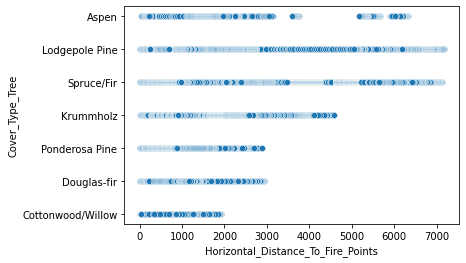

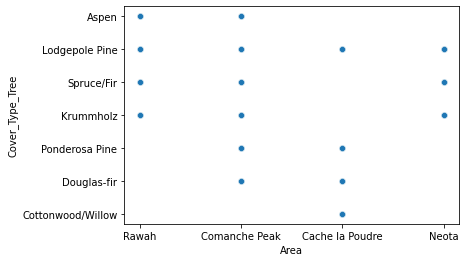

In [ ]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=data['Elevation'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Aspect'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Slope'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Horizontal_Distance_To_Hydrology'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Vertical_Distance_To_Hydrology'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Horizontal_Distance_To_Roadways'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Hillshade_9am'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Hillshade_Noon'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Hillshade_3pm'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Horizontal_Distance_To_Fire_Points'], y = data['Cover_Type_Tree'])
plt.show()
sns.scatterplot(x=data['Area'], y = data['Cover_Type_Tree'])

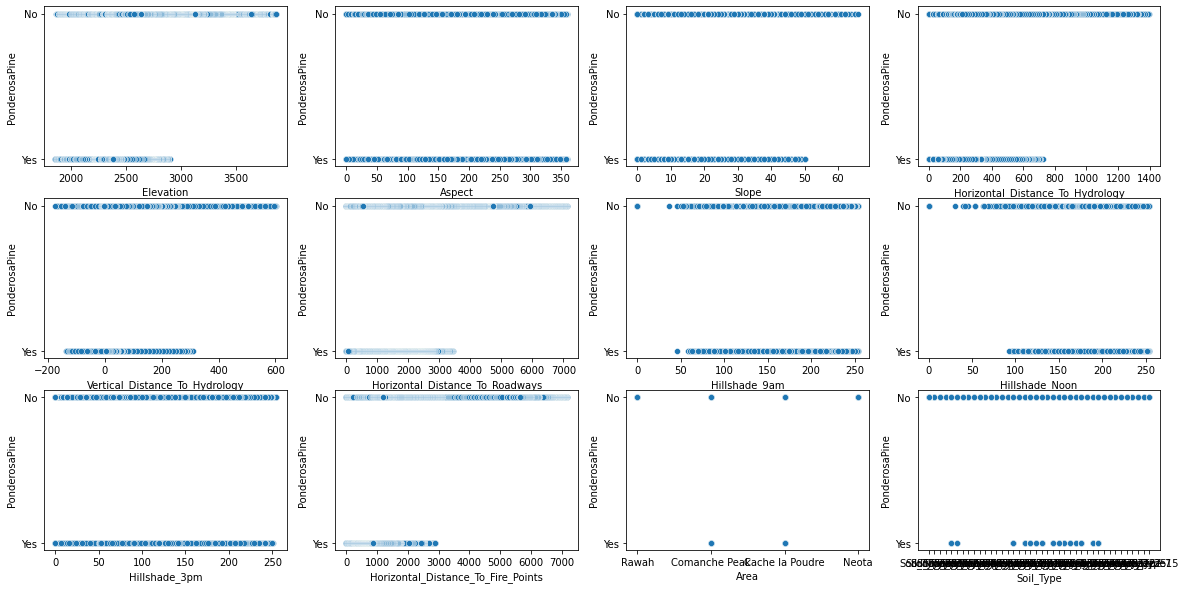

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(341)
sns.scatterplot(x=data['Elevation'], y = data['PonderosaPine'])
plt.subplot(342)
sns.scatterplot(x=data['Aspect'], y = data['PonderosaPine'])
plt.subplot(343)
sns.scatterplot(x=data['Slope'], y = data['PonderosaPine'])
plt.subplot(344)
sns.scatterplot(x=data['Horizontal_Distance_To_Hydrology'], y = data['PonderosaPine'])
plt.subplot(345)
sns.scatterplot(x=data['Vertical_Distance_To_Hydrology'], y = data['PonderosaPine'])
plt.subplot(346)
sns.scatterplot(x=data['Horizontal_Distance_To_Roadways'], y = data['PonderosaPine'])
plt.subplot(347)
sns.scatterplot(x=data['Hillshade_9am'], y = data['PonderosaPine'])
plt.subplot(348)
sns.scatterplot(x=data['Hillshade_Noon'], y = data['PonderosaPine'])
plt.subplot(349)
sns.scatterplot(x=data['Hillshade_3pm'], y = data['PonderosaPine'])
plt.subplot(3,4,10)
sns.scatterplot(x=data['Horizontal_Distance_To_Fire_Points'], y = data['PonderosaPine'])
plt.subplot(3,4,11)
sns.scatterplot(x=data['Area'], y = data['PonderosaPine'])
plt.subplot(3,4,12)
sns.scatterplot(x=data['Soil_Type'], y = data['PonderosaPine'])
plt.show()

In [ ]:
PonderosaPine = data.reset_index(drop=True)
PonderosaPine.to_csv("/content/drive/MyDrive/PonderosaPine.csv", index = False)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/PonderosaPine.csv")

# Cover_Type, 'Cover_Type_Tree'가 있으면 데이터 누수가 발생(정답이므로,,,)하므로 삭제, 
# object는 category 로 자료형 변경
df = df.drop(columns = ['Cover_Type','Cover_Type_Tree'], axis=1)
df['Area'] = df['Area'].astype('category')
df['Soil_Type'] = df['Soil_Type'].astype('category')
df['PonderosaPine'] = df['PonderosaPine'].astype('category')
df.info()
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Elevation                           581012 non-null  int64   
 1   Aspect                              581012 non-null  int64   
 2   Slope                               581012 non-null  int64   
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64   
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64   
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64   
 6   Hillshade_9am                       581012 non-null  int64   
 7   Hillshade_Noon                      581012 non-null  int64   
 8   Hillshade_3pm                       581012 non-null  int64   
 9   Horizontal_Distanc

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Area,Soil_Type,PonderosaPine
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,Soil_Type29,No
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,Soil_Type29,No
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,Soil_Type12,No
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,Soil_Type30,No
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,Soil_Type29,No


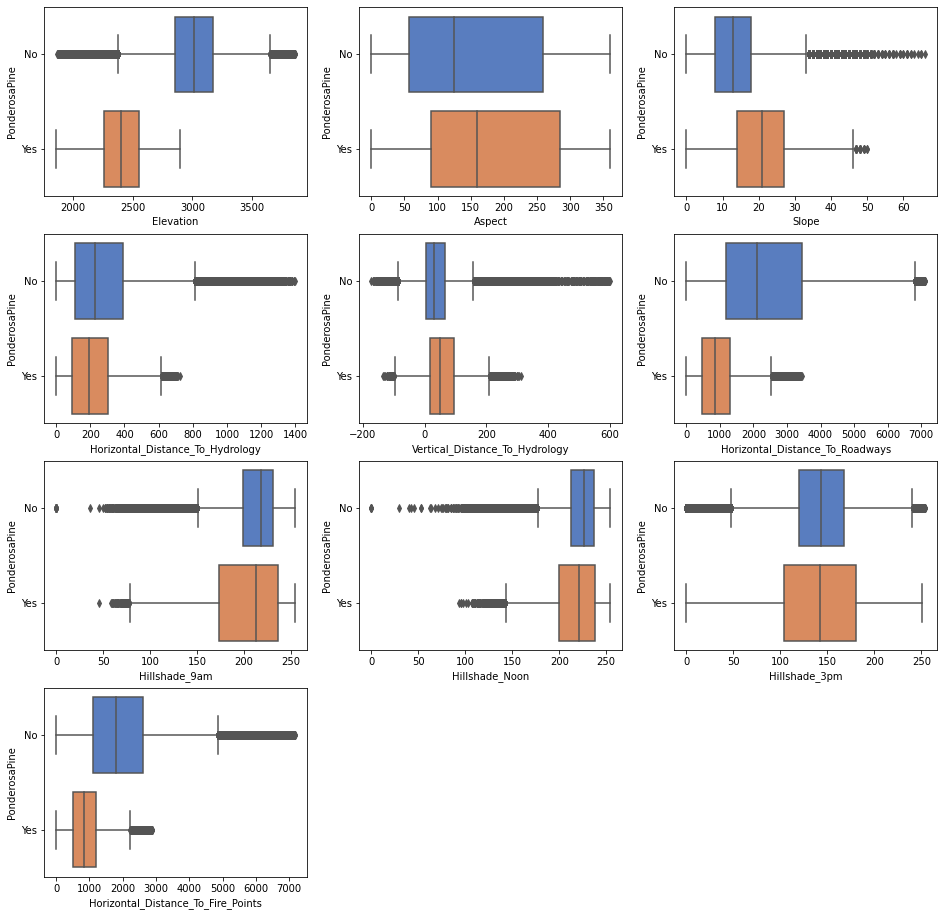

In [ ]:
# 수치형 특성
numeric_features = df.dtypes[df.dtypes != 'category'].index
fig = plt.figure(figsize=(16, 16))
i = 1
for f in numeric_features :
    plt.subplot(4,3,i)
    sns.boxplot(data=df, x=f, y = 'PonderosaPine', palette="muted")
    i += 1

In [ ]:
# 수치형 특성의 아웃라이어를 삭제여부 검토 필요

# def outlier_iqr(data) :
#     q1, q3 = data.quantile([0.25, 0.75])
#     iqr = q3 - q1
#     return q3 + (iqr*1.5)

# Elevation_upper = outlier_iqr(df['Elevation'])
# Aspect_upper = outlier_iqr(df['Aspect'])
# Slope_upper = outlier_iqr(df['Slope'])
# Horizontal_Distance_To_Hydrology_upper = outlier_iqr(df['Horizontal_Distance_To_Hydrology'])

# Vertical_Distance_To_Hydrology_upper = outlier_iqr(df['Vertical_Distance_To_Hydrology'])
# Horizontal_Distance_To_Roadways_upper = outlier_iqr(df['Horizontal_Distance_To_Roadways'])
# Hillshade_9am_upper = outlier_iqr(df['Hillshade_9am'])
# Hillshade_Noon_upper = outlier_iqr(df['Hillshade_Noon'])

# Hillshade_3pm_upper = outlier_iqr(df['Hillshade_3pm'])
# Horizontal_Distance_To_Fire_Points_upper = outlier_iqr(df['Horizontal_Distance_To_Fire_Points'])

# df = df[(df['Elevation']<Elevation_upper)]
# df = df[(df['Aspect']<Aspect_upper)]
# df = df[(df['Slope']<Slope_upper)]
# df = df[(df['Horizontal_Distance_To_Hydrology'] <Horizontal_Distance_To_Hydrology_upper)]
# df = df[(df['Vertical_Distance_To_Hydrology']<Vertical_Distance_To_Hydrology_upper)]
# df = df[(df['Horizontal_Distance_To_Roadways']<Horizontal_Distance_To_Roadways_upper)]
# df = df[(df['Hillshade_9am']<Hillshade_9am_upper)]
# df = df[(df['Hillshade_Noon']<Hillshade_Noon_upper)]
# df = df[(df['Hillshade_3pm']<Hillshade_3pm_upper)]
# df = df[(df['Horizontal_Distance_To_Fire_Points']<Horizontal_Distance_To_Fire_Points_upper)]

In [ ]:
# 수치형 특성의 아웃라이어를 삭제여부 검토 필요

# def outlier_iqr2(data) :
#     q1, q3 = data.quantile([0.25, 0.75])
#     iqr = q3 - q1
#     return q1 - (iqr*1.5)

# Elevation_down = outlier_iqr2(df['Elevation'])
# Aspect_down = outlier_iqr2(df['Aspect'])
# Slope_down = outlier_iqr2(df['Slope'])
# Horizontal_Distance_To_Hydrology_down = outlier_iqr2(df['Horizontal_Distance_To_Hydrology'])

# Vertical_Distance_To_Hydrology_down = outlier_iqr2(df['Vertical_Distance_To_Hydrology'])
# Horizontal_Distance_To_Roadways_down = outlier_iqr2(df['Horizontal_Distance_To_Roadways'])
# Hillshade_9am_down = outlier_iqr2(df['Hillshade_9am'])
# Hillshade_Noon_down = outlier_iqr2(df['Hillshade_Noon'])

# Hillshade_3pm_down = outlier_iqr2(df['Hillshade_3pm'])
# Horizontal_Distance_To_Fire_Points_down = outlier_iqr2(df['Horizontal_Distance_To_Fire_Points'])

# df = df[(df['Elevation']>Elevation_down)]
# df = df[(df['Aspect']>Aspect_down)]
# df = df[(df['Slope']>Slope_down)]
# df = df[(df['Horizontal_Distance_To_Hydrology'] >Horizontal_Distance_To_Hydrology_down)]
# df = df[(df['Vertical_Distance_To_Hydrology']>Vertical_Distance_To_Hydrology_down)]
# df = df[(df['Horizontal_Distance_To_Roadways']>Horizontal_Distance_To_Roadways_down)]
# df = df[(df['Hillshade_9am']>Hillshade_9am_down)]
# df = df[(df['Hillshade_Noon']>Hillshade_Noon_down)]
# df = df[(df['Hillshade_3pm']>Hillshade_3pm_down)]
# df = df[(df['Horizontal_Distance_To_Fire_Points']>Horizontal_Distance_To_Fire_Points_down)]

In [ ]:
# 수치형 특성
# numeric_features = df.dtypes[df.dtypes != 'category'].index
# fig = plt.figure(figsize=(16, 16))
# i = 1
# for f in numeric_features :
#     plt.subplot(4,3,i)
#     sns.boxplot(data=df, x=f, y = 'PonderosaPine', palette="muted")
#     i += 1

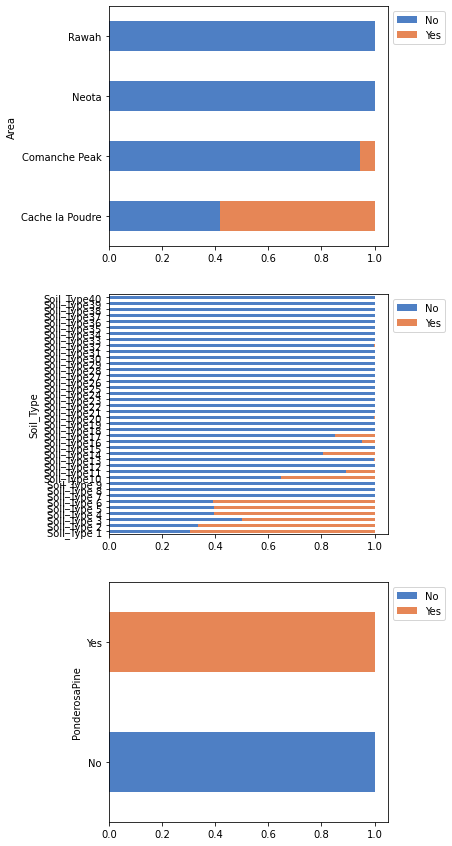

In [ ]:
# 범주형 특성 일부와 타겟의 관계를 시각화
cat_features = df.dtypes[df.dtypes != 'int64'].index
fig = plt.figure(figsize=(5, 15))

for i, feature in enumerate(cat_features) :
    tmp = pd.crosstab(index=df[feature], columns=df['PonderosaPine'], normalize='index')
    ax = plt.subplot(3,1,i+1)
    tmp.plot(kind='barh', stacked=True, ax=plt.gca(), color = ['#4e7fc4', '#e68656'])
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    i += 1
plt.show()


#     tmp.plot(kind='barh', stacked=True, ax=plt.gca(), color = ['#4e7fc4', '#e68656']) : 토양 관련 자료 시각화 자료 만들기

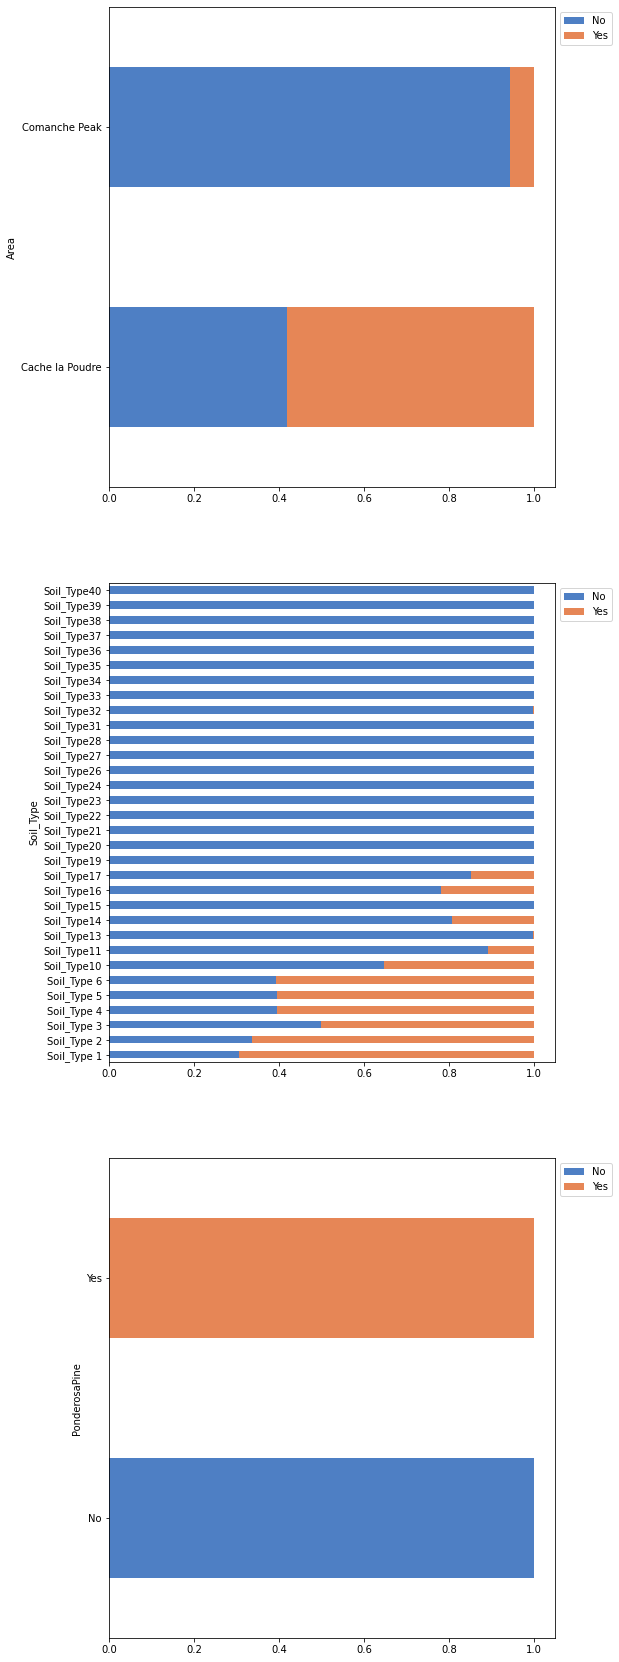

In [ ]:
df = df[(df['Area'] == 'Comanche Peak') | (df['Area'] == 'Cache la Poudre')]

cat_features = df.dtypes[df.dtypes != 'int64'].index
fig = plt.figure(figsize=(8, 30))

for i, feature in enumerate(cat_features) :
    tmp = pd.crosstab(index=df[feature], columns=df['PonderosaPine'], normalize='index')
    ax = plt.subplot(3,1,i+1)
    tmp.plot(kind='barh', stacked=True, ax=plt.gca(), color = ['#4e7fc4', '#e68656'])
    plt.xticks(rotation=0)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    i += 1
plt.show()


In [ ]:
PonderosaPine_out = df.reset_index(drop=True)
PonderosaPine_out.to_csv("/content/drive/MyDrive/PonderosaPine_out.csv", index = False)

# Area중에서 폰테로사 소나무가 서식하지 않는 Neota와 Rawah제외